In [5]:
#Libraries

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load Data

In [28]:
df = pd.read_csv('data/dataset.csv')

In [29]:
df.head(3)

,Unnamed: 0,Date_imp,Date_imp_d,Cluster,Category_name,name,price,disc_price,merchant,condition,...,sourceURLs,weight,Date_imp_d.1,Day_n,month,month_n,day,Week_Number,Zscore_1,price_std
0,4,2017-12-14 06:00:00,2017/12/14,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.0,64.99,Walmart.com,New,...,https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...,14 pounds,2017/12/14,Thursday,12,December,14,50,0.001525,3.880725
1,5,2017-09-08 05:00:00,2017/09/08,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.0,69.00,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/09/08,Friday,9,September,8,36,0.001525,3.880725
2,6,2017-10-24 04:00:00,2017/10/24,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,66.0,66.00,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/10/24,Tuesday,10,October,24,43,-0.760844,3.880725


In [30]:
# 1.0 - Data Description

In [31]:
df1 = df.copy()

In [32]:
## 1.1 - Data Dimension

In [33]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 23151
Number of columns: 32


In [34]:
## 1.2 - Data types

In [35]:
df1.dtypes

Unnamed: 0           int64
Date_imp            object
Date_imp_d          object
Cluster              int64
Category_name       object
name                object
price              float64
disc_price         float64
merchant            object
condition           object
Disc_percentage    float64
isSale              object
Imp_count            int64
brand               object
p_description       object
currency            object
dateAdded           object
dateSeen            object
dateUpdated         object
imageURLs           object
manufacturer        object
shipping            object
sourceURLs          object
weight              object
Date_imp_d.1        object
Day_n               object
month                int64
month_n             object
day                  int64
Week_Number          int64
Zscore_1           float64
price_std          float64
dtype: object

In [36]:
## 1.3 Remove columns that will not be used and rename the ones that remain

In [37]:
df1 = df1.drop(columns={'Unnamed: 0', 'Date_imp', 'Cluster', 'condition', 'sourceURLs', 'Date_imp_d.1', 
                                'Zscore_1', 'price_std', 'imageURLs', 'shipping', 'weight', 'currency'})

In [38]:
cols_name = ['date_imp', 'category_name', 'name', 'price', 'disc_price',
       'merchant', 'disc_percentage', 'is_sale', 'imp_count', 'brand',
       'p_description', 'dateadded', 'dateseen', 'dateupdated', 'manufacturer',
       'day_n', 'month', 'month_n', 'day', 'week_number']
df1.columns = cols_name

In [39]:
## 1.4 Check NA

In [40]:
df1.isna().sum()

date_imp               0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
dateadded              0
dateseen               0
dateupdated            0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

In [44]:
## 1.5 - Change Data Types

In [45]:
df1['date_imp'] = pd.to_datetime(df1['date_imp'])

In [46]:
## 1.6 - Descriptive Analysis

In [47]:
#1.6.1 - Select numeric attributes:
num_attributes = df1.select_dtypes(include=['float64', 'int64'])
#1.6.2 - Select categorical attributes:
cat_attributes = df1.select_dtypes(exclude=['float64', 'int64', 'datetime64[ns]'])

In [52]:
#1.6.1 - Numeric Attributes Analysis
#central tendency
#->Mean
ct1 = pd.DataFrame(num_attributes.apply(np.mean) ).T   
#->Median
ct2 = pd.DataFrame(num_attributes.apply(np.median) ).T  

#dispersion
#->Standard deviation
d1 = pd.DataFrame(num_attributes.apply(np.std) ).T 
#->Minimum value
d2 = pd.DataFrame(num_attributes.apply(min) ).T
#->Maximum value
d3 = pd.DataFrame(num_attributes.apply(max) ).T
#-> Range
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min())).T
#->Skewness
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew())).T
#->Kurtosis
d6 = pd.DataFrame(num_attributes.apply( lambda x : x.kurtosis())).T

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']
m

,att,min,max,range,mean,median,std,skew,kurt
0,price,1.0,10879.95,10878.95,513.037803,199.99,859.091448,4.595160,34.411146
1,disc_price,1.0,10879.95,10878.95,494.104295,199.00,808.571509,4.748349,39.612839
2,disc_percentage,0.0,0.80,0.80,0.016933,0.00,0.077847,5.217632,28.754920
3,imp_count,1.0,31.00,30.00,6.560926,5.00,5.403049,1.286351,1.639569
4,month,1.0,12.00,11.00,7.651030,8.00,2.592787,-0.099417,-0.628859
5,day,1.0,31.00,30.00,15.693879,16.00,9.681413,0.032258,-1.331838
6,week_number,1.0,51.00,50.00,31.342750,32.00,11.316253,-0.266980,-0.648027


In [ ]:
# 2.0 - Exploratory Data Analysis (EDA)

In [55]:
df2 = df1.copy()

<Axes: xlabel='merchant', ylabel='date_imp'>

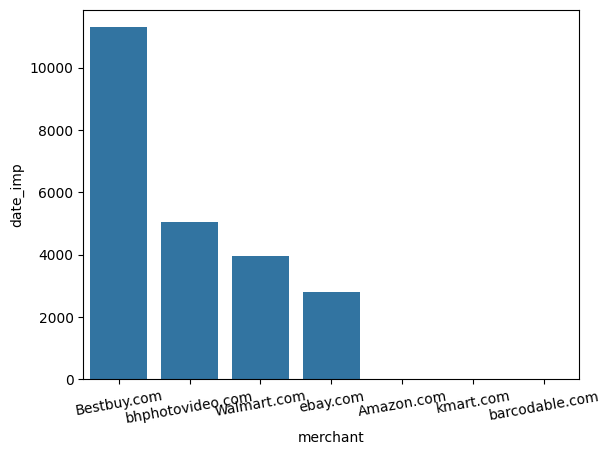

In [65]:
# 2.1 Which merchant has the highest sales?
aux1 = df2[['date_imp', 'merchant']].groupby('merchant').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=10)
sns.barplot(x='merchant', y='date_imp', data=aux1)

In [66]:
#Select stores
df_bestbuy = df2[df['merchant'] == 'Bestbuy.com']
df_bhphoto = df2[df['merchant'] == 'bhphotovideo.com']
df_walmart = df2[df['merchant'] == 'Walmart.com']
df_ebay = df2[df['merchant'] == 'ebay.com']

<Axes: xlabel='category_name', ylabel='date_imp'>

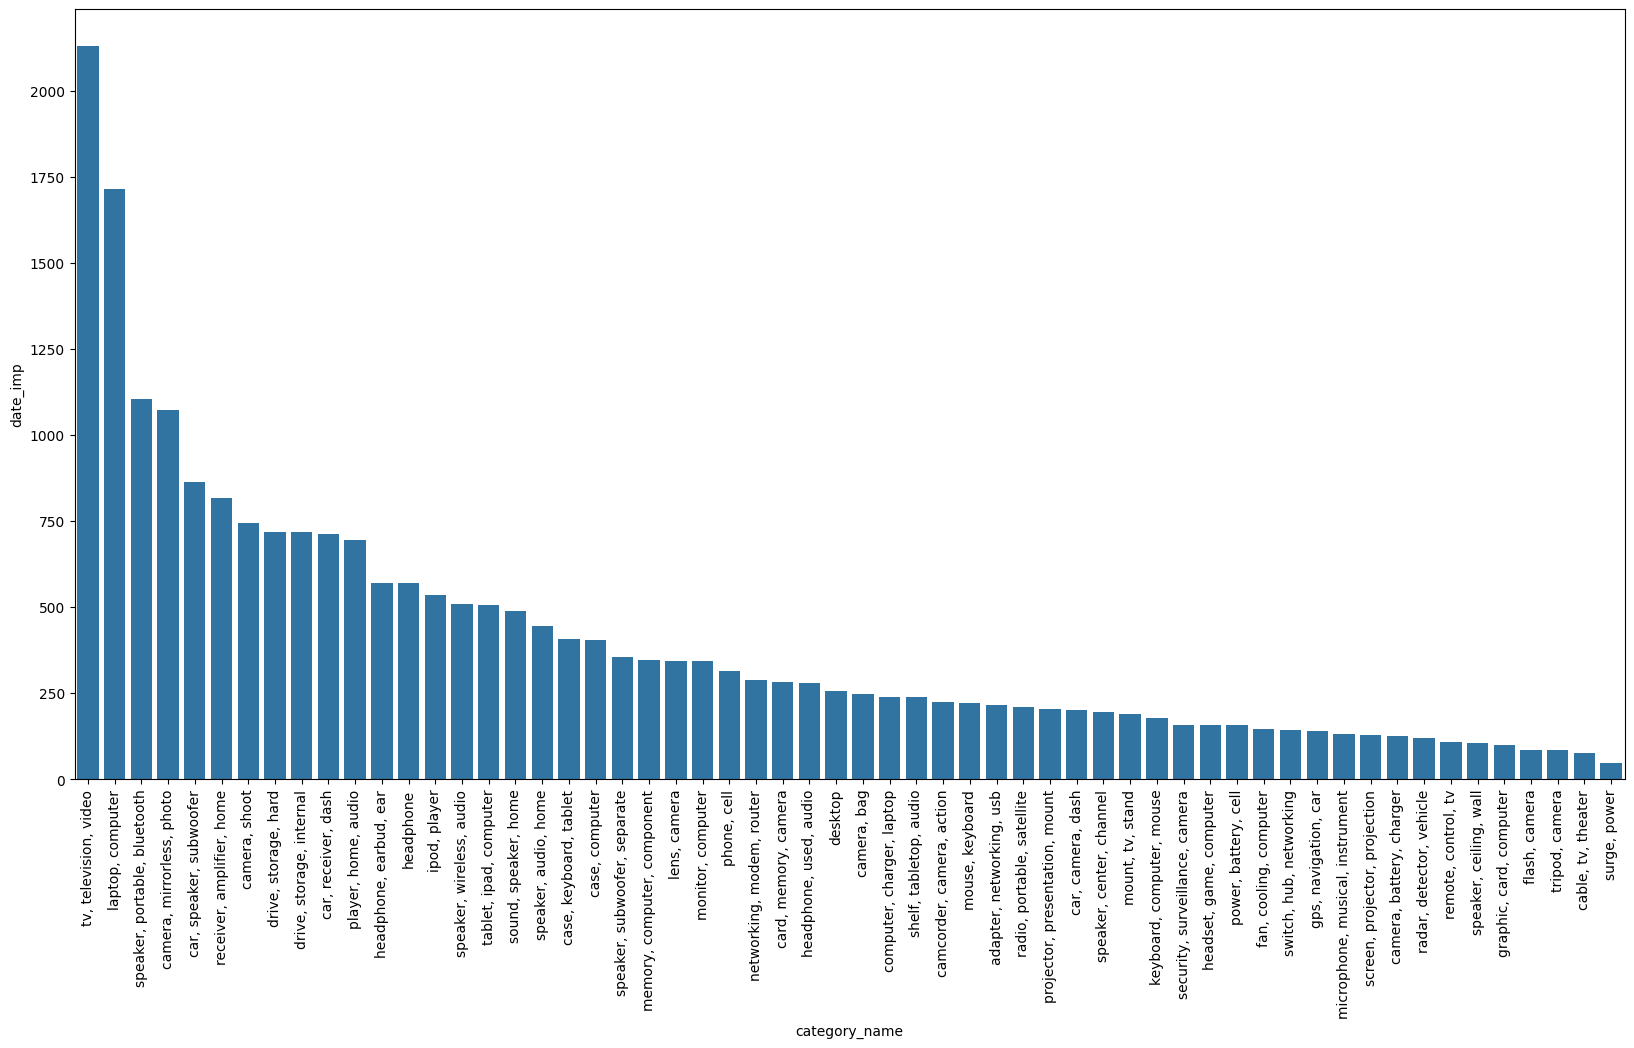

In [75]:
# 2.2 What is the top-selling category?
# 2.2.1 Overall top-selling category
aux2 = df2[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
sns.barplot(x='category_name', y='date_imp', data=aux2)


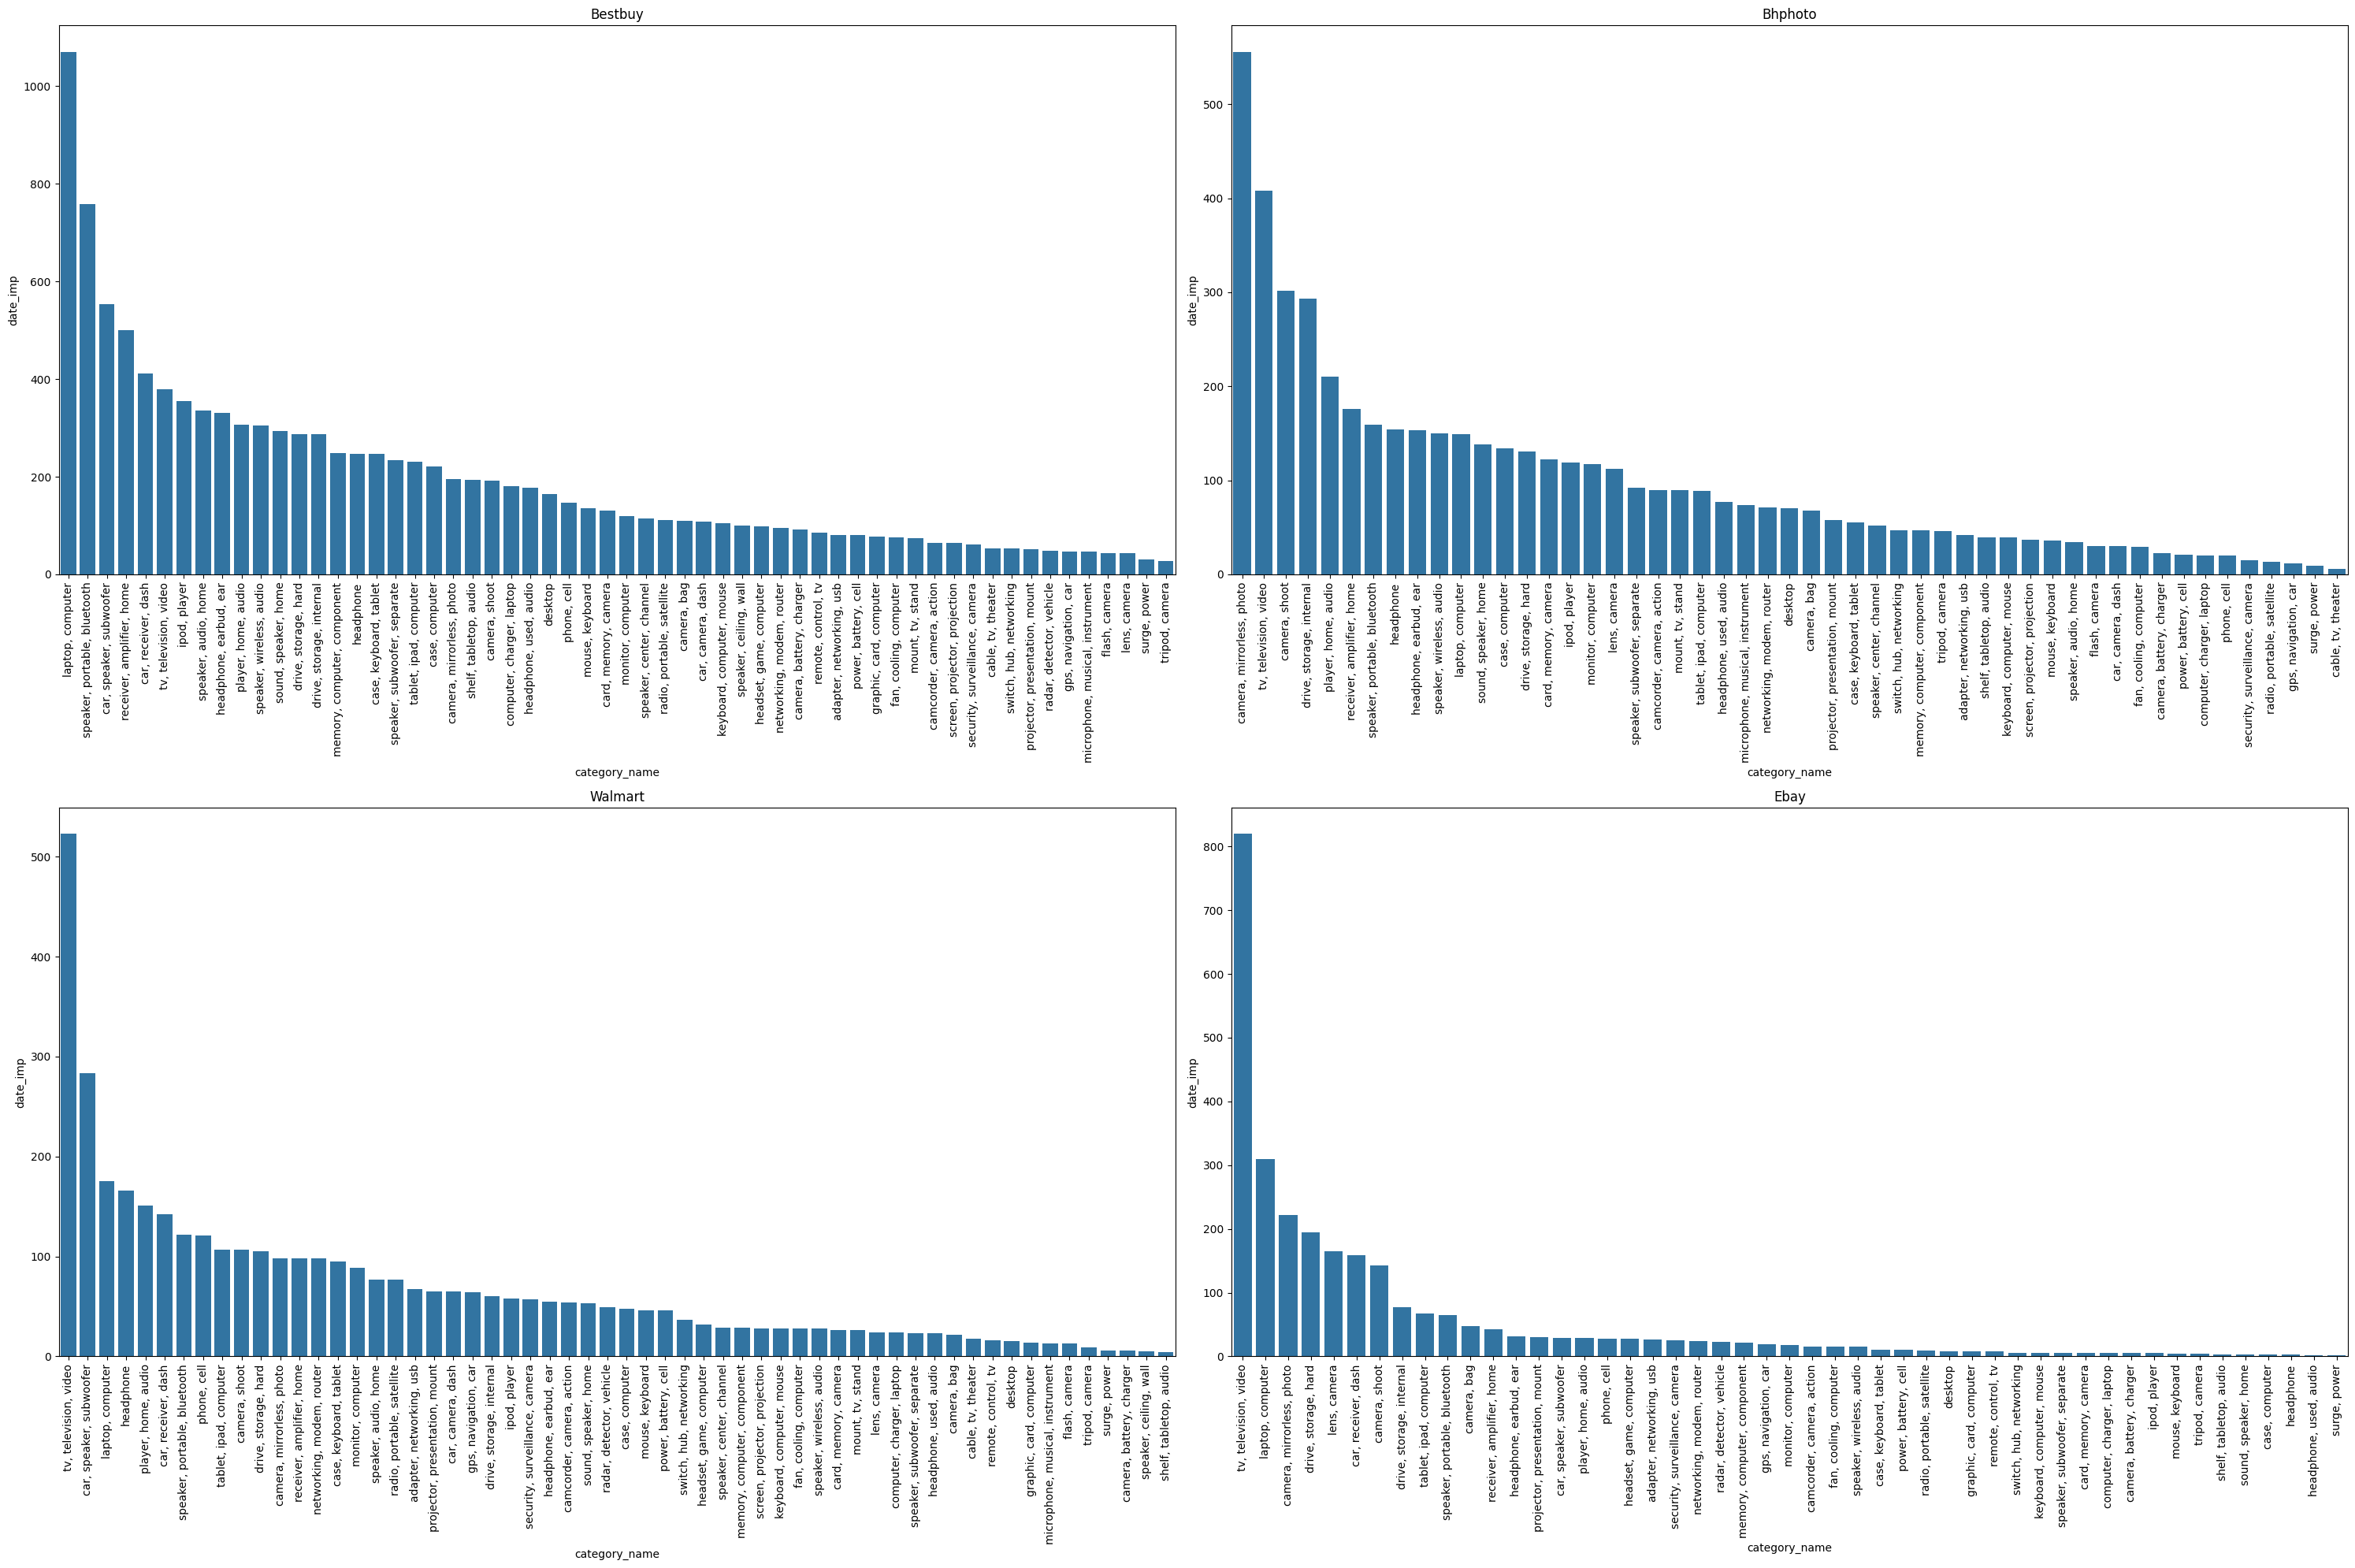

In [80]:
# 2.2.2 Top-selling categories by store
plt.figure(figsize=(30, 20))

plt.subplot(2,2,1)
aux3 = df_bestbuy[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Bestbuy')
sns.barplot(x='category_name', y='date_imp', data=aux3)

plt.subplot(2,2,2)
aux4 = df_bhphoto[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Bhphoto')
sns.barplot(x='category_name', y='date_imp', data=aux4)

plt.subplot(2,2,3)
aux5 = df_walmart[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart')
sns.barplot(x='category_name', y='date_imp', data=aux5)

plt.subplot(2,2,4)
aux6 = df_ebay[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay')
sns.barplot(x='category_name', y='date_imp', data=aux6)

plt.tight_layout()

<Axes: xlabel='brand', ylabel='date_imp'>

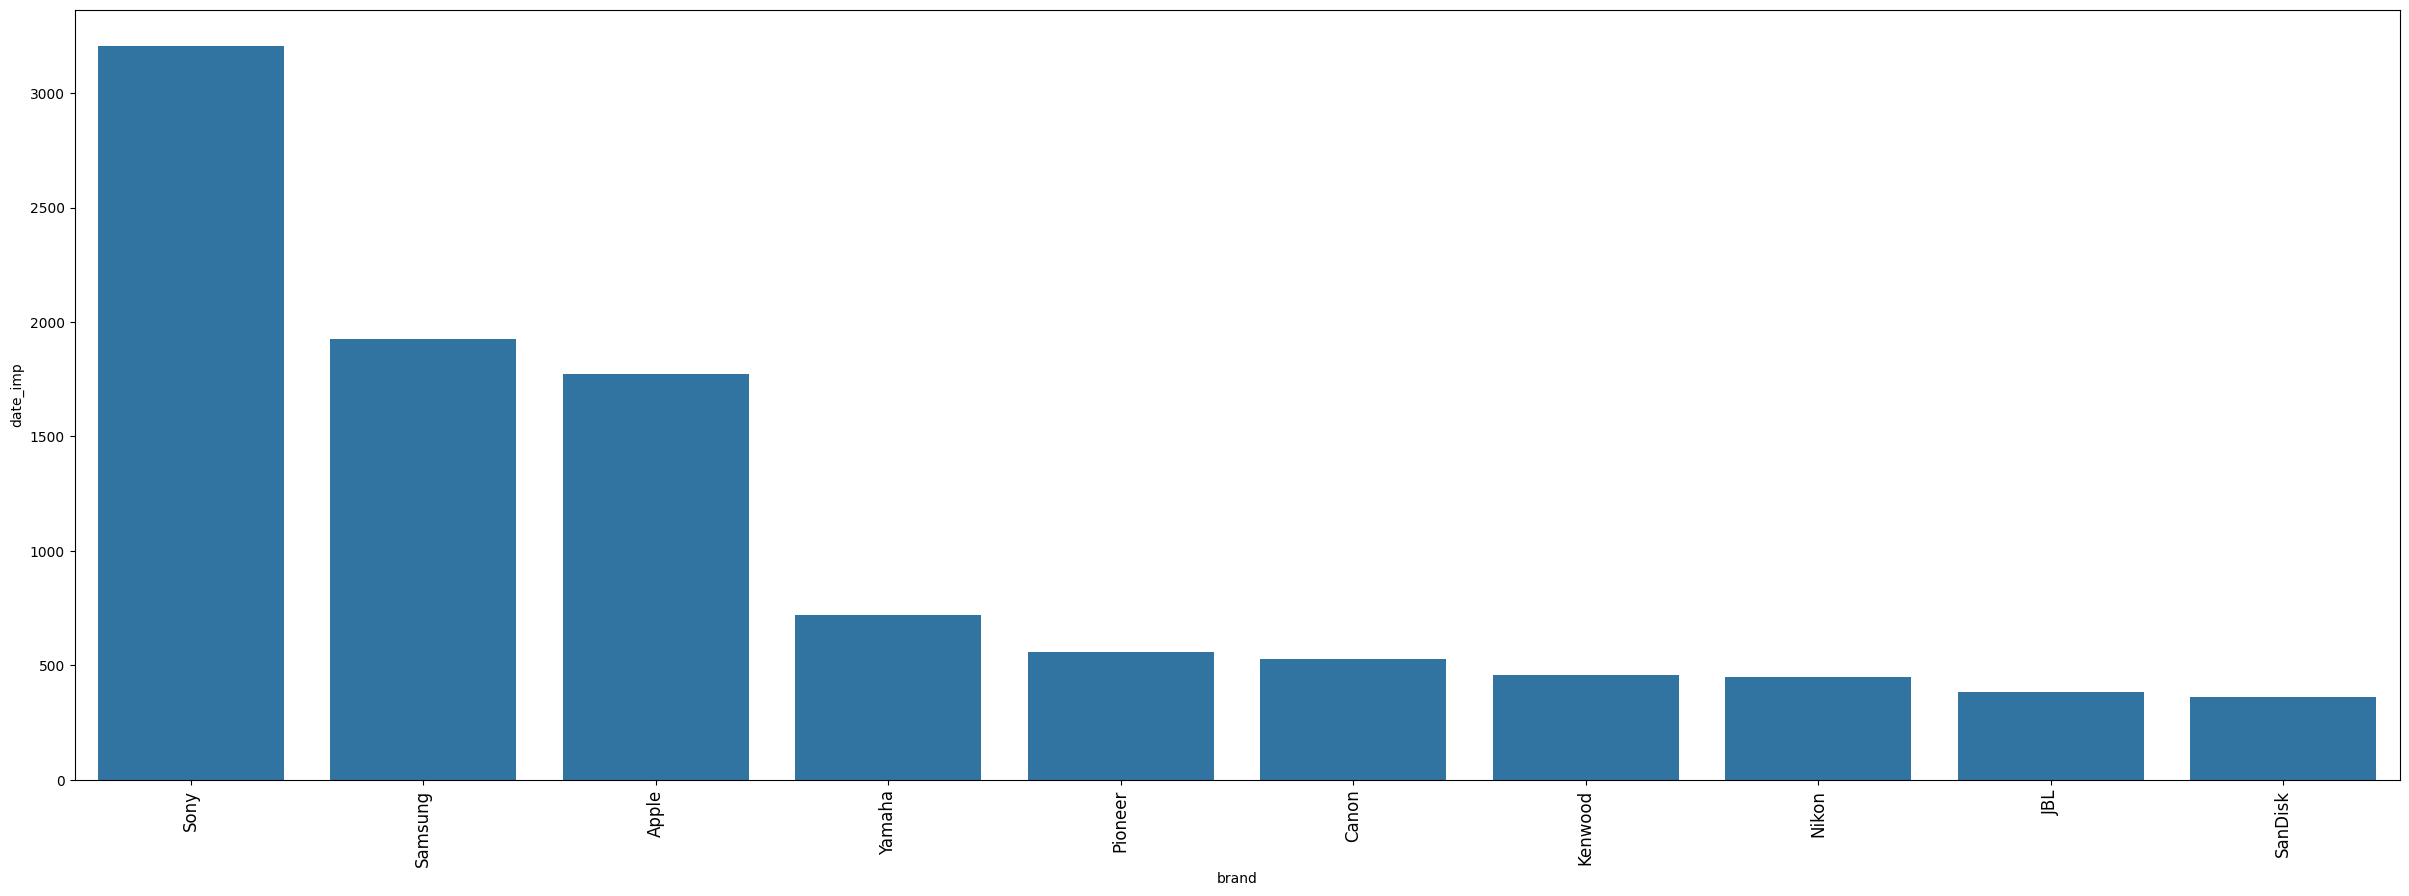

In [89]:
# 2.3 What is the top-selling brand?
# 2.3.1 Overall top-selling brand
aux7 = df2[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90, fontsize=12)
sns.barplot(x='brand', y='date_imp', data=aux7.head(10))

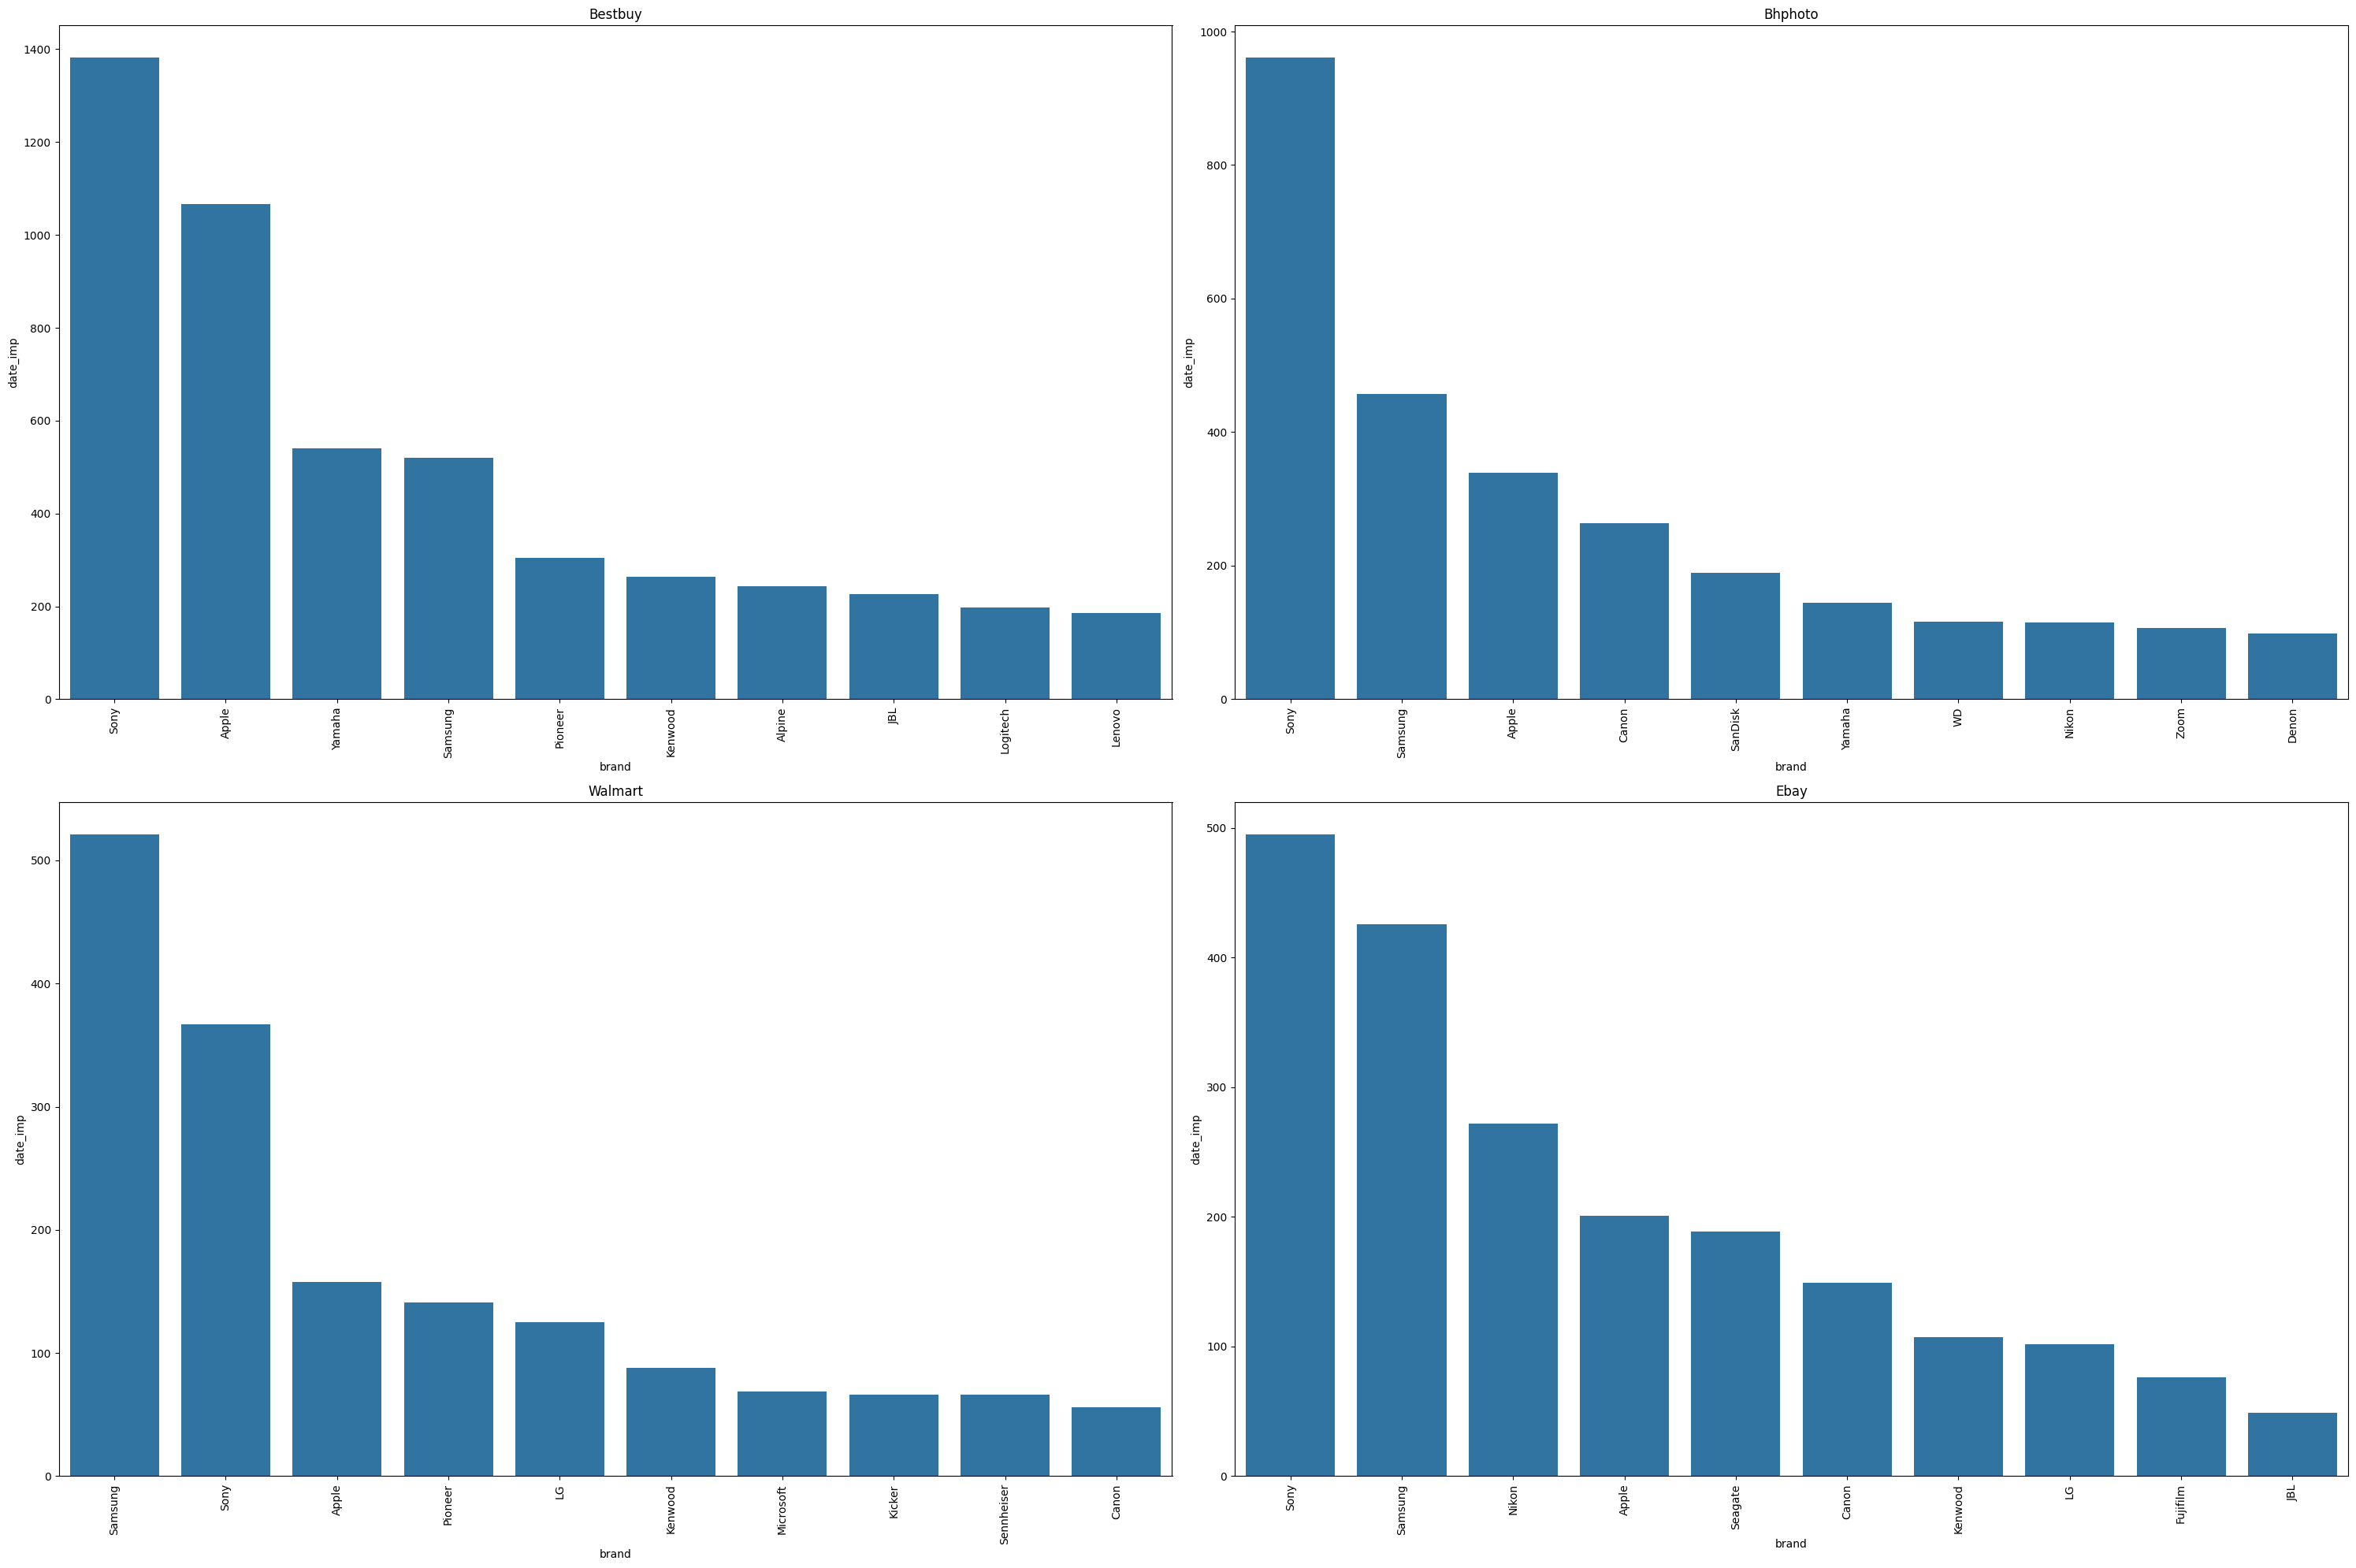

In [91]:
# 2.3.2 What is the best-selling brand by store?
plt.figure(figsize=(30, 20))

plt.subplot(2,2,1)
aux8 = df_bestbuy[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Bestbuy')
sns.barplot(x='brand', y='date_imp', data=aux8.head(10))

plt.subplot(2,2,2)
aux9 = df_bhphoto[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Bhphoto')
sns.barplot(x='brand', y='date_imp', data=aux9.head(10))

plt.subplot(2,2,3)
aux10 = df_walmart[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart')
sns.barplot(x='brand', y='date_imp', data=aux10.head(10))

plt.subplot(2,2,4)
aux11 = df_ebay[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay')
sns.barplot(x='brand', y='date_imp', data=aux11.head(10))

plt.tight_layout()

<Axes: xlabel='day_n', ylabel='date_imp'>

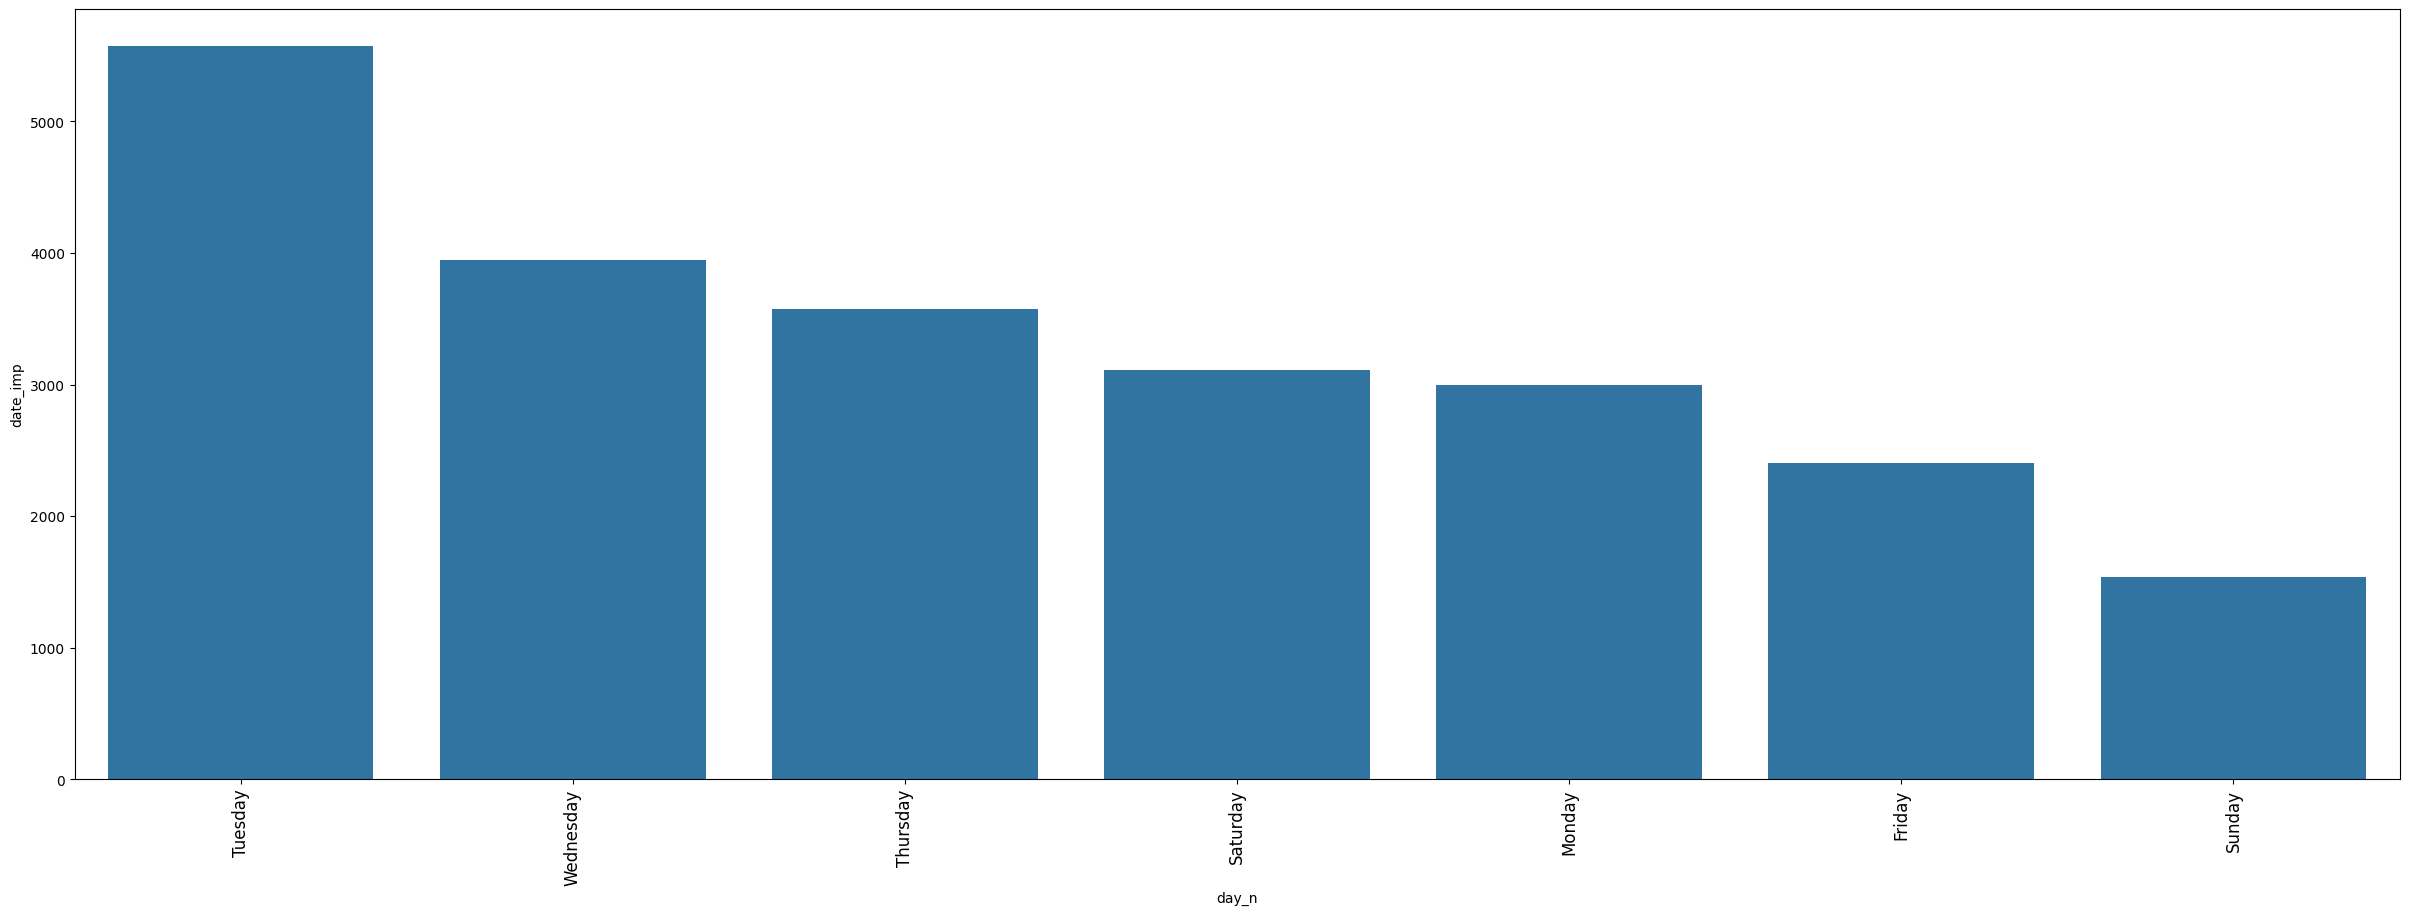

In [93]:
# 2.4 On which week days are the sales the highest?
aux12 = df2[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90, fontsize=12)
sns.barplot(x='day_n', y='date_imp', data=aux12)

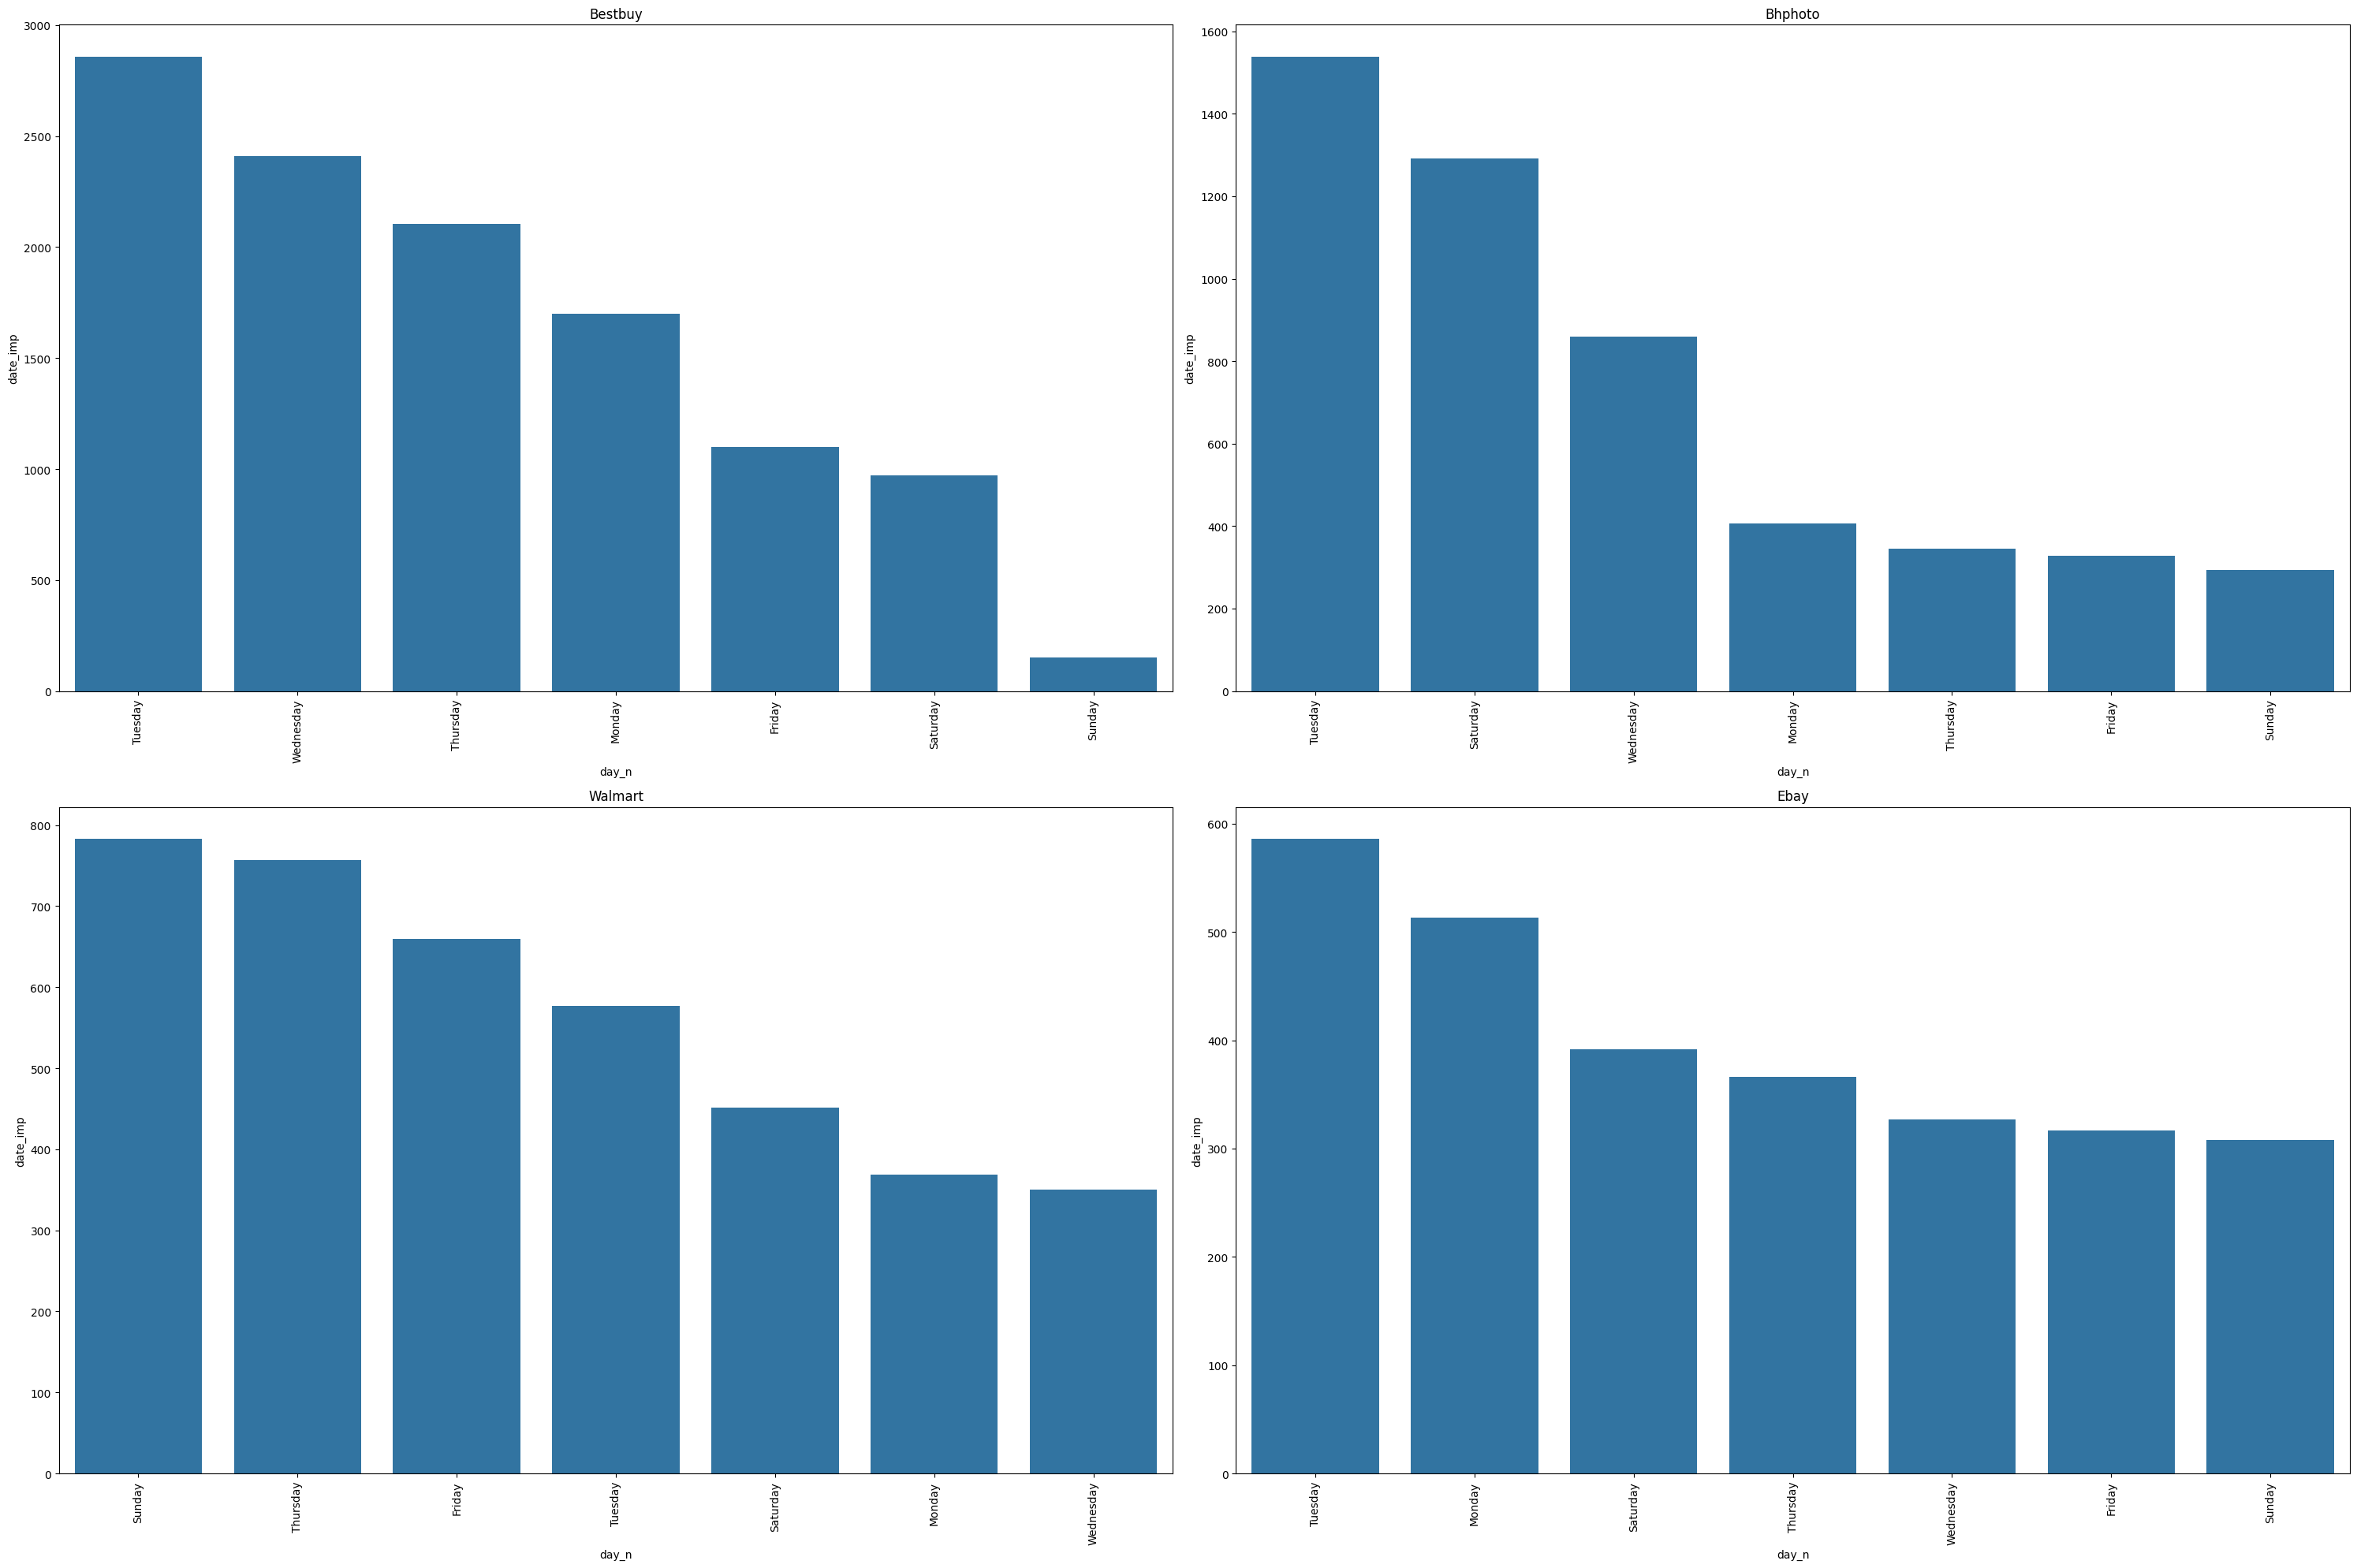

In [94]:
# 2.4.1 Which days have the highest sales by store?
plt.figure(figsize=(30, 20))

plt.subplot(2,2,1)
aux13 = df_bestbuy[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Bestbuy')
sns.barplot(x='day_n', y='date_imp', data=aux13)

plt.subplot(2,2,2)
aux14 = df_bhphoto[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Bhphoto')
sns.barplot(x='day_n', y='date_imp', data=aux14)

plt.subplot(2,2,3)
aux15 = df_walmart[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart')
sns.barplot(x='day_n', y='date_imp', data=aux15)

plt.subplot(2,2,4)
aux16 = df_ebay[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay')
sns.barplot(x='day_n', y='date_imp', data=aux16)

plt.tight_layout()

<Axes: xlabel='month_n', ylabel='date_imp'>

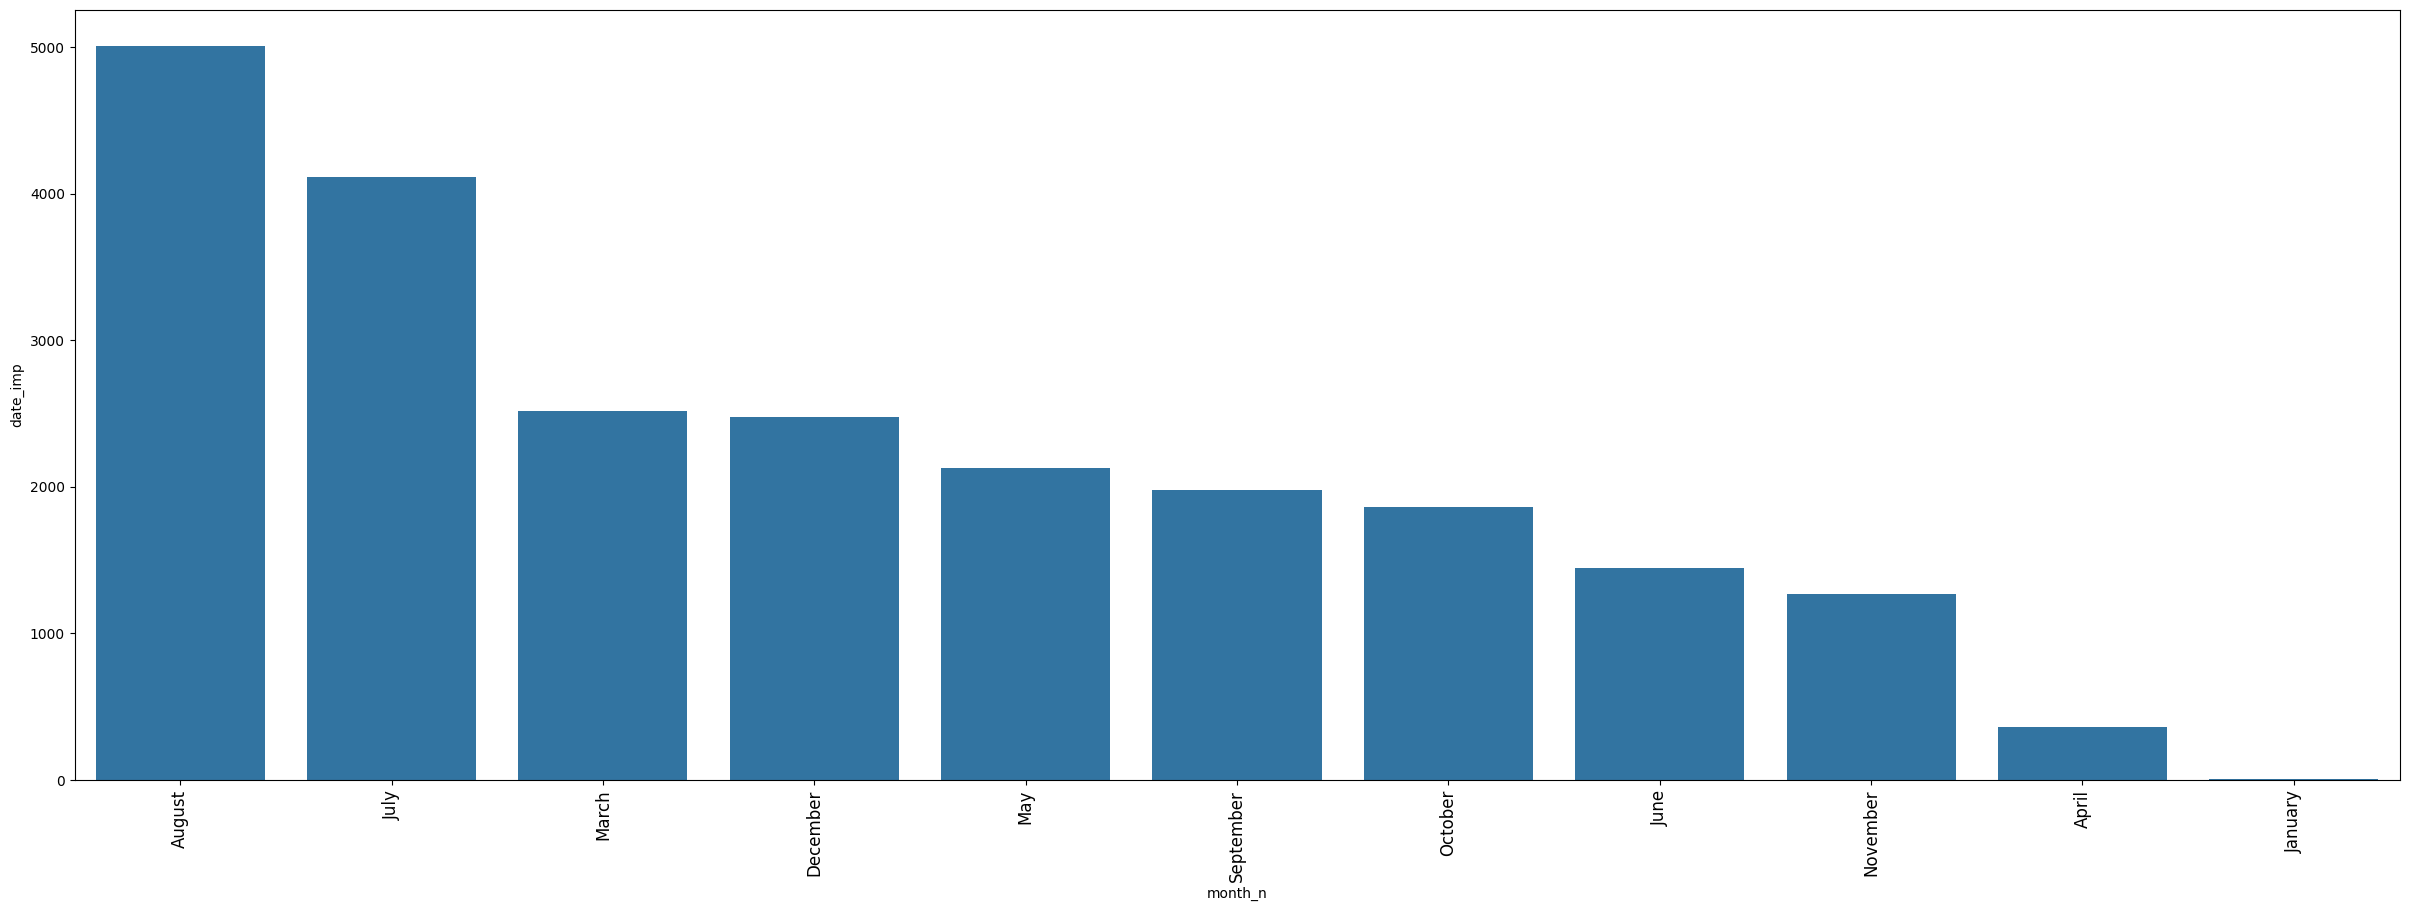

In [95]:
# 2.5 In which months are the sales the highest?
aux17 = df2[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90, fontsize=12)
sns.barplot(x='month_n', y='date_imp', data=aux17)

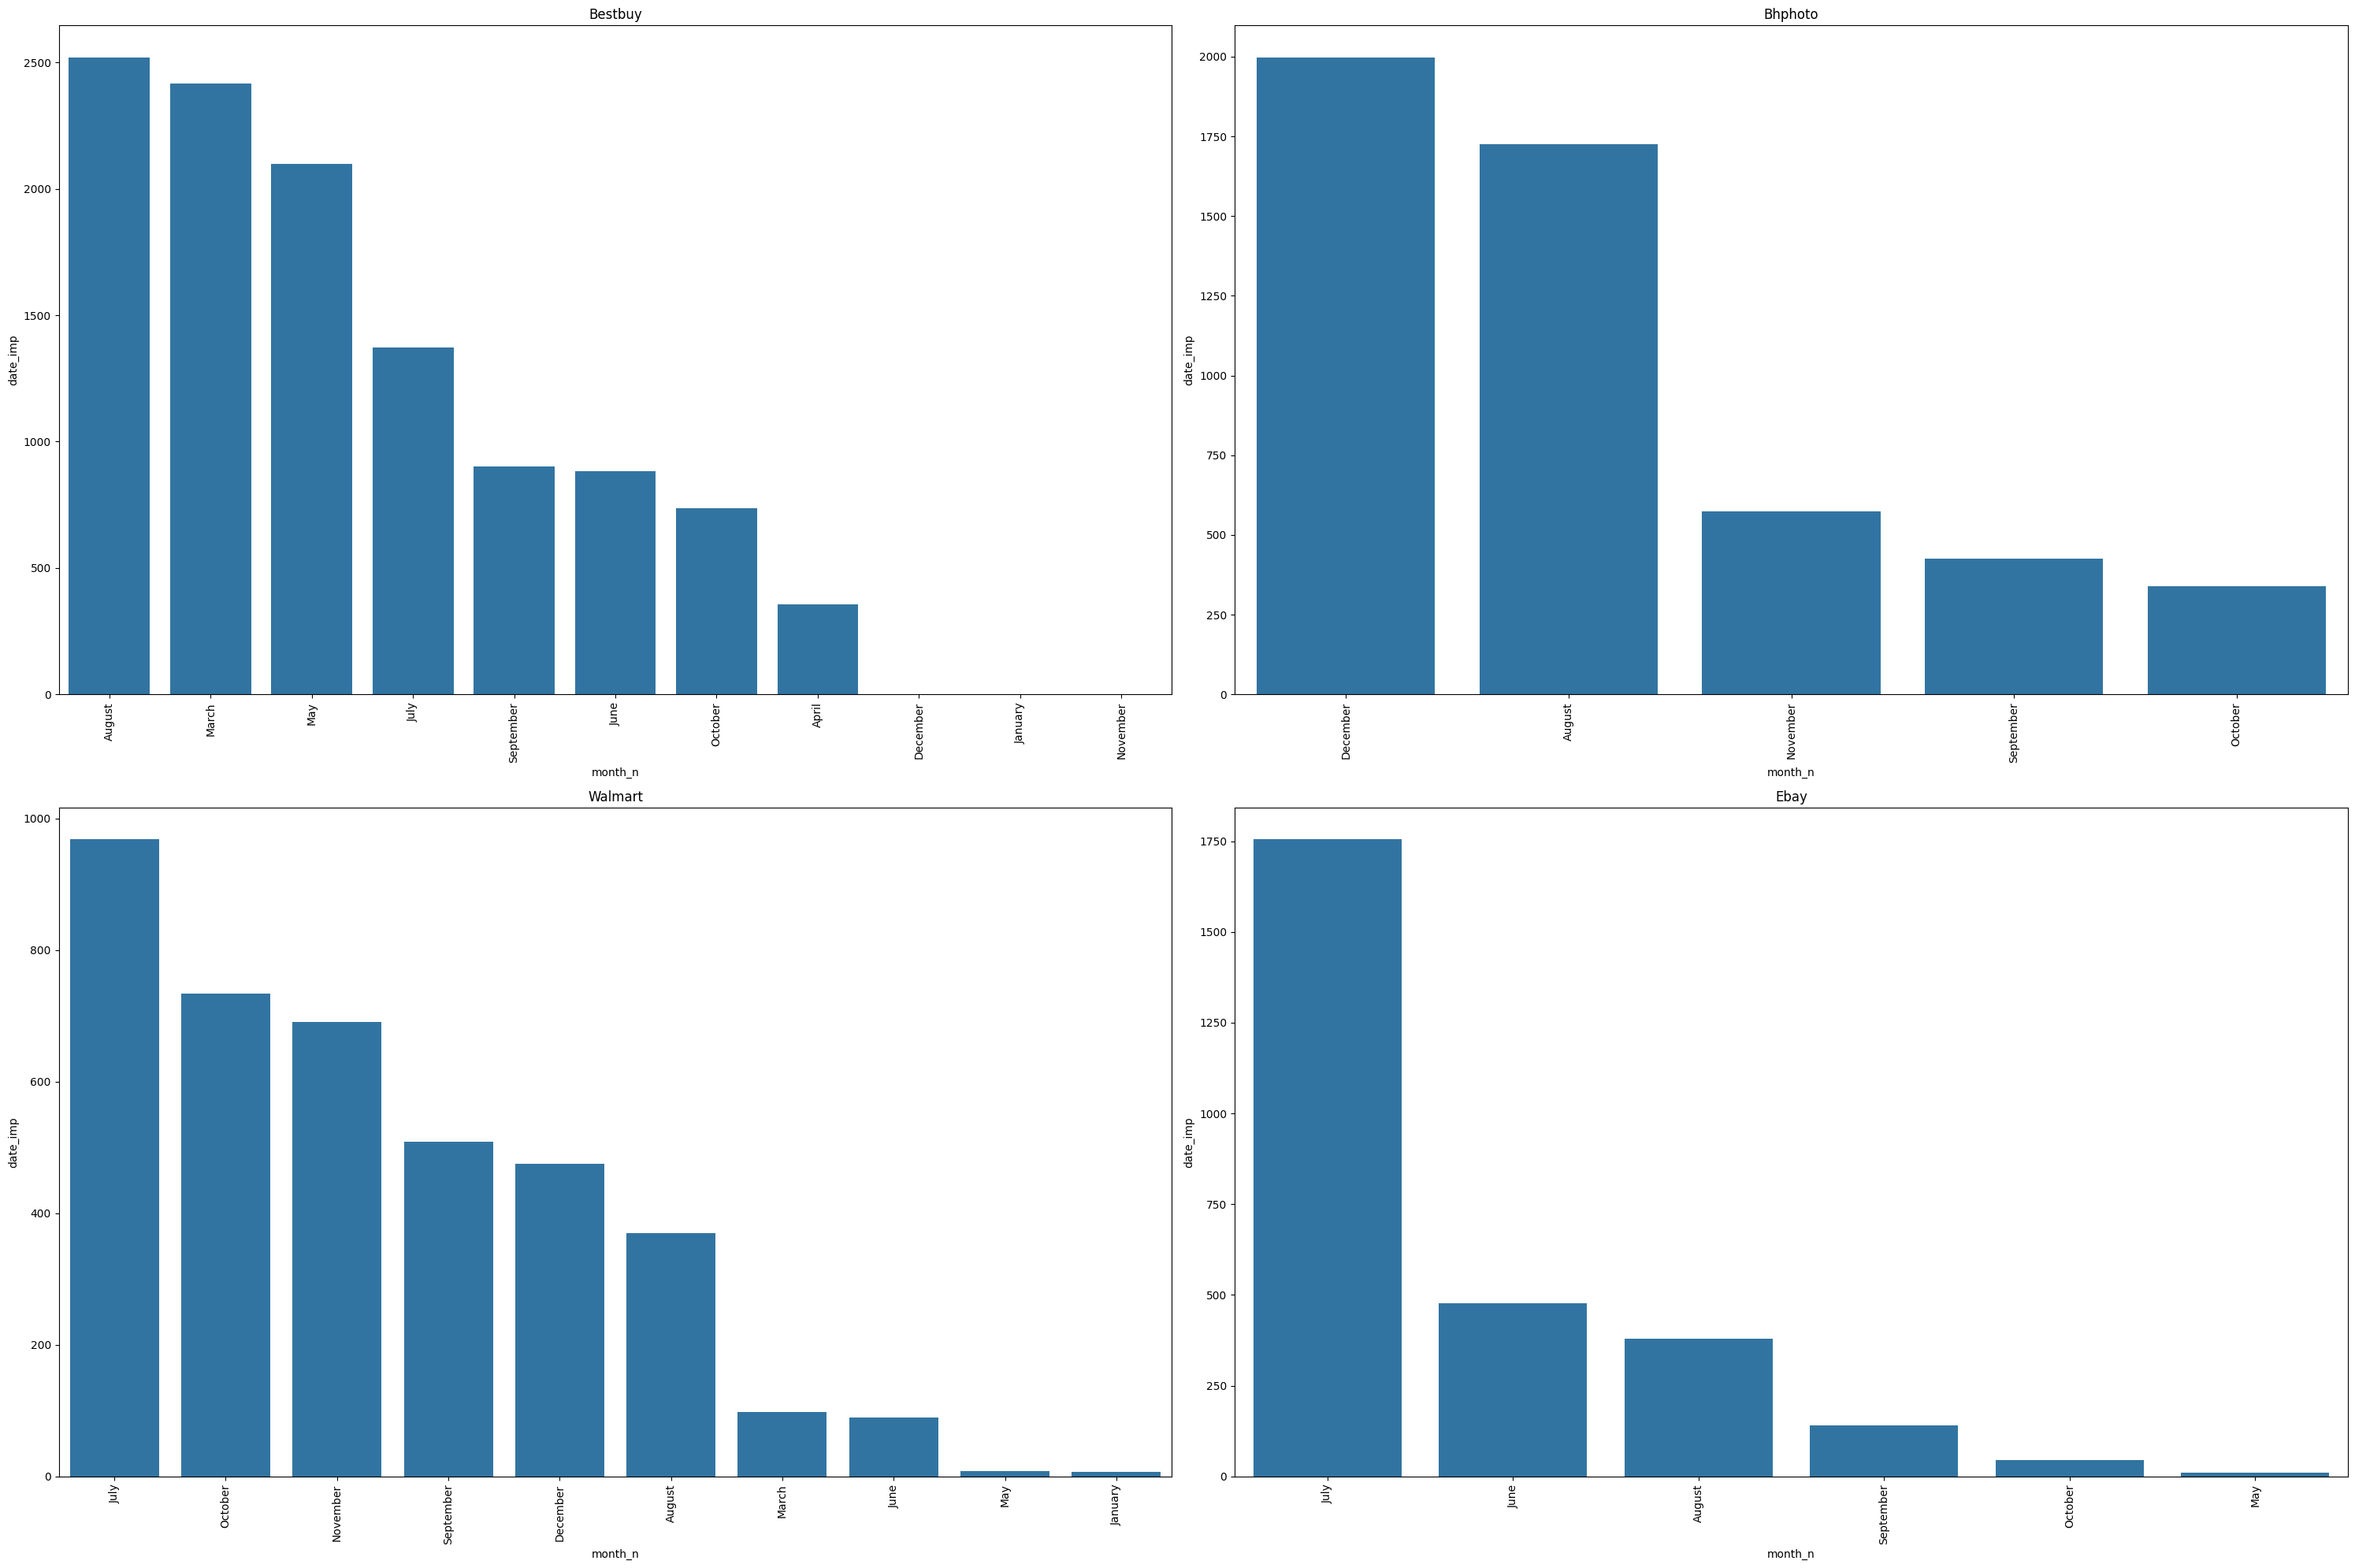

In [96]:
#2.5.1 Which months have the highest sales by store?
plt.figure(figsize=(30, 20))

plt.subplot(2,2,1)
aux18 = df_bestbuy[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Bestbuy')
sns.barplot(x='month_n', y='date_imp', data=aux18)

plt.subplot(2,2,2)
aux19 = df_bhphoto[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Bhphoto')
sns.barplot(x='month_n', y='date_imp', data=aux19)

plt.subplot(2,2,3)
aux20 = df_walmart[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart')
sns.barplot(x='month_n', y='date_imp', data=aux20)

plt.subplot(2,2,4)
aux21 = df_ebay[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay')
sns.barplot(x='month_n', y='date_imp', data=aux21)

plt.tight_layout()

<Axes: xlabel='week_number', ylabel='date_imp'>

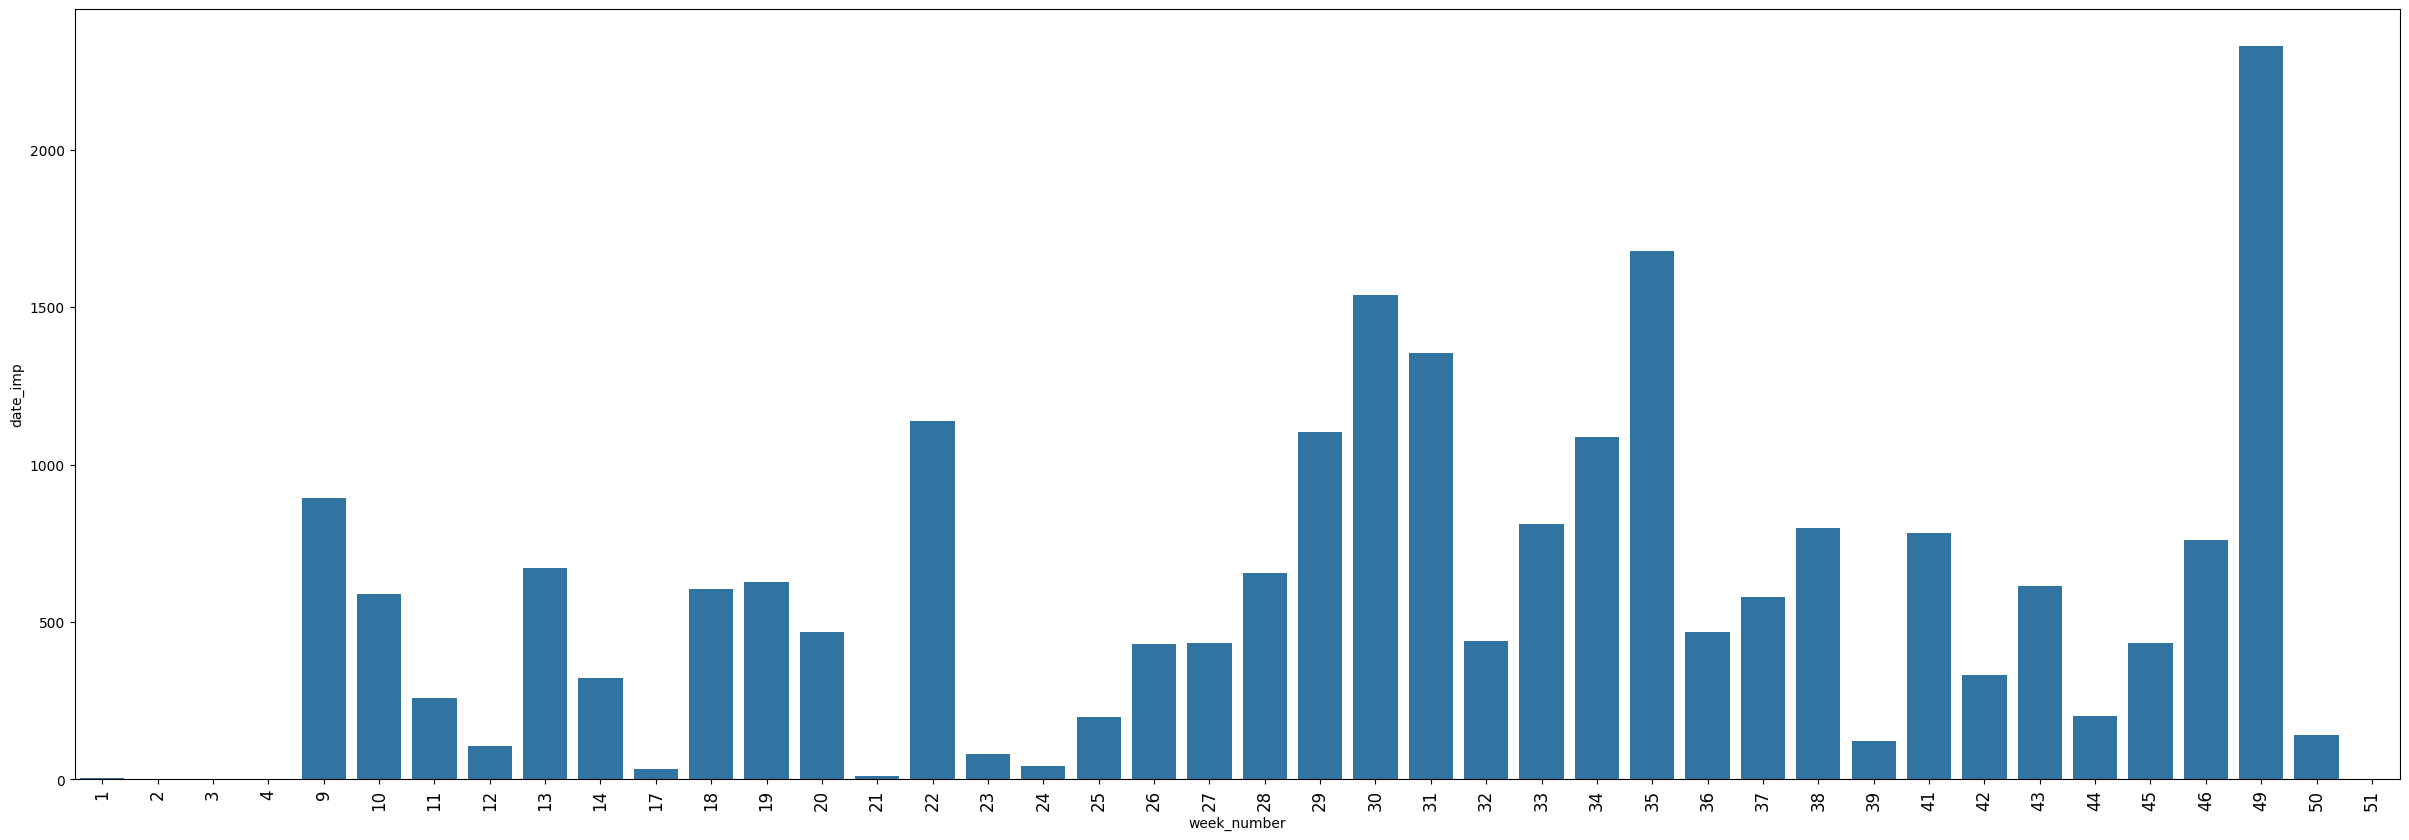

In [97]:
# 2.6 During which weeks are the sales the highest?
aux22 = df2[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90, fontsize=12)
sns.barplot(x='week_number', y='date_imp', data=aux22)


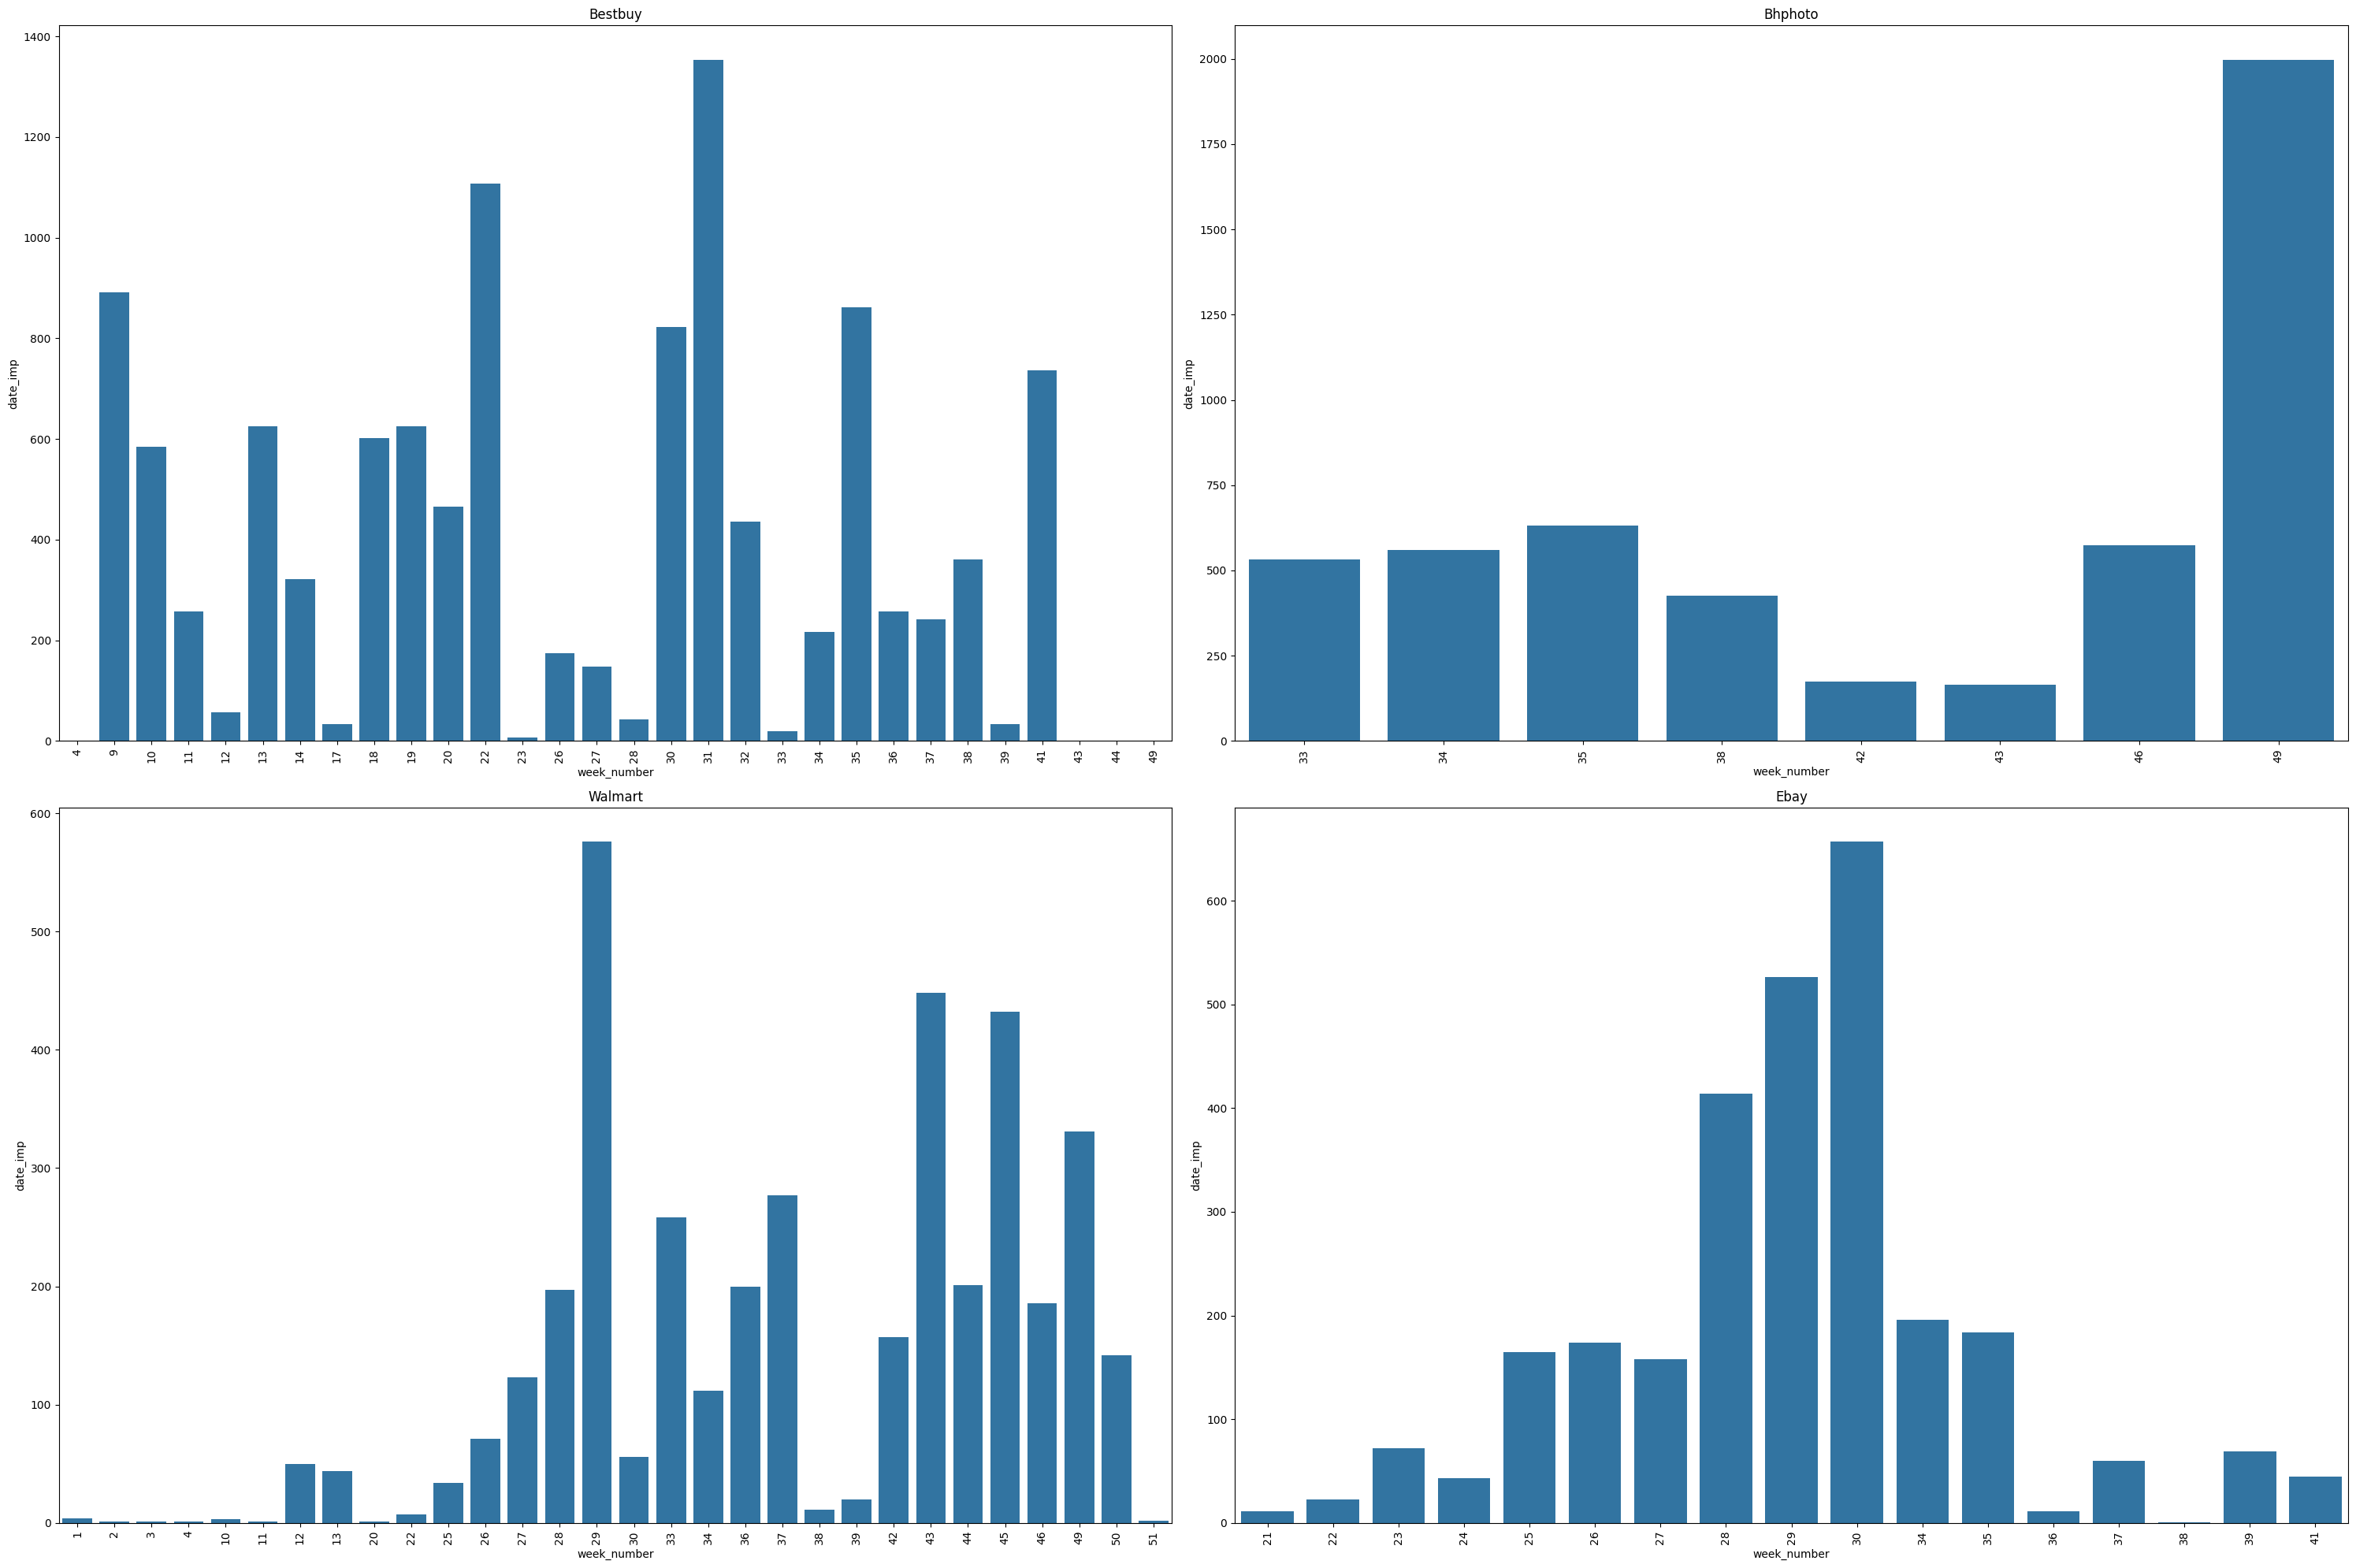

In [98]:
# 2.6.1 Which week of the year has the highest sales by store?
plt.figure(figsize=(30, 20))

plt.subplot(2,2,1)
aux23 = df_bestbuy[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Bestbuy')
sns.barplot(x='week_number', y='date_imp', data=aux23)

plt.subplot(2,2,2)
aux24 = df_bhphoto[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Bhphoto')
sns.barplot(x='week_number', y='date_imp', data=aux24)

plt.subplot(2,2,3)
aux25 = df_walmart[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart')
sns.barplot(x='week_number', y='date_imp', data=aux25)

plt.subplot(2,2,4)
aux26 = df_ebay[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay')
sns.barplot(x='week_number', y='date_imp', data=aux26)

plt.tight_layout()